In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

8. Work through these same exercises using the Telco dataset.

In [2]:
df = pd.read_csv('titanic.csv', index_col=[0])
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
from prepare import clean_titanic_data

In [6]:
df = clean_titanic_data(df)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


### 1. What is your baseline prediction? What is your baseline accuracy?

In [7]:
df.survived.value_counts()

# baseline prediction is : 0

0    549
1    342
Name: survived, dtype: int64

In [8]:
# baseline_prediction
df['baseline_prediction'] = 0
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline_prediction
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0


In [55]:
df['fare'] = df['fare'].astype(str)

In [56]:
df['pclass'] = df['pclass'].astype(str)

In [65]:
df['sex_male'] = df['sex_male'].astype(str)

In [67]:
df['embark_town_Queenstown'] = df['embark_town_Queenstown'].astype(str)

In [68]:
df['embark_town_Southampton'] = df['embark_town_Southampton'].astype(str)

In [75]:
df['survived'] = df['survived'].astype(str)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   passenger_id             891 non-null    int64 
 1   survived                 891 non-null    object
 2   pclass                   891 non-null    object
 3   sex                      891 non-null    object
 4   sibsp                    891 non-null    int64 
 5   parch                    891 non-null    int64 
 6   fare                     891 non-null    object
 7   embark_town              891 non-null    object
 8   alone                    891 non-null    int64 
 9   sex_male                 891 non-null    object
 10  embark_town_Queenstown   891 non-null    object
 11  embark_town_Southampton  891 non-null    object
 12  baseline_prediction      891 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 97.5+ KB


In [58]:
baseline_accuracy = (df.survived == df.baseline_prediction).mean()
baseline_accuracy

0.6161616161616161

In [59]:
x = classification_report(df.survived, df.baseline_prediction,
                         labels = [1,0],
                         output_dict = True)
pd.DataFrame(x).T

,precision,recall,f1-score,support
1,0.000000,0.000000,0.000000,342.000000
0,0.616162,1.000000,0.762500,549.000000
accuracy,0.616162,0.616162,0.616162,0.616162
macro avg,0.308081,0.500000,0.381250,891.000000
weighted avg,0.379655,0.616162,0.469823,891.000000


### 2. Fit the decision tree classifier to your training sample and transform

In [77]:
X = df[['pclass','sex_male','embark_town_Queenstown','embark_town_Southampton','fare']]
y = df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pclass                   891 non-null    object
 1   sex_male                 891 non-null    object
 2   embark_town_Queenstown   891 non-null    object
 3   embark_town_Southampton  891 non-null    object
 4   fare                     891 non-null    object
dtypes: object(5)
memory usage: 41.8+ KB


In [46]:
X_train.head()

,pclass,sex_male,embark_town_Queenstown,embark_town_Southampton,fare
456,1,1,0,1,26.55
8,3,0,0,1,11.1333
19,3,0,0,0,7.225
95,3,1,0,1,8.05
86,3,1,0,1,34.375


In [47]:
y_train[:5]

456    0
8      1
19     1
95     0
86     0
Name: survived, dtype: int64

In [48]:
y_train.value_counts()

0    298
1    200
Name: survived, dtype: int64

In [82]:
# step 1: Creat your recipe

tree = DecisionTreeClassifier(max_depth = 3)

In [83]:
# Step 2: Fit your model to your in-sample data (train)

tree.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 26.12
|   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 24.81
|   |   |   |--- class: 1
|   |   |--- fare >  24.81
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.14
|   |   |   |--- class: 0
|   |   |--- fare >  26.14
|   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- fare <= 7.91
|   |   |   |--- class: 0
|   |   |--- fare >  7.91
|   |   |   |--- class: 0



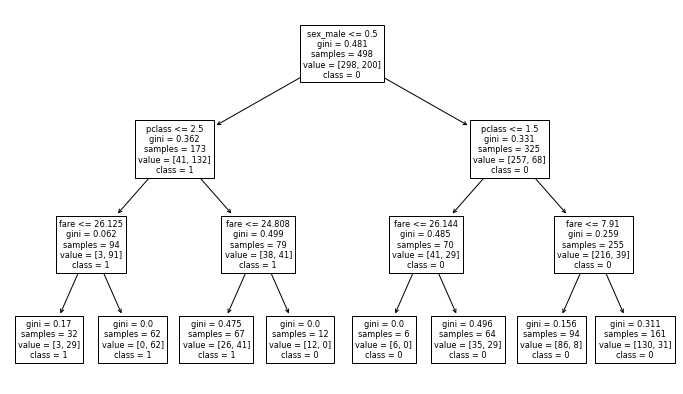

In [84]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [85]:
# Step 3: Use your model to make predictions on the in-sample data
tree.predict(X_train)

array(['0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1

In [86]:
predictions = tree.predict(X_train)
actual = y_train

In [93]:
# Step 4: Evaluate your predictions
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,269,29
1,68,132


In [94]:
confusion_matrix(actual, predictions)

array([[269,  29],
       [ 68, 132]])

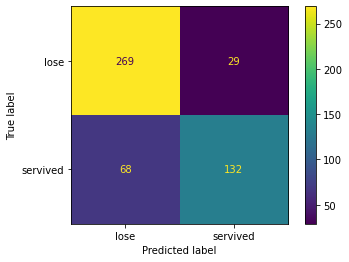

In [95]:
plot_confusion_matrix(tree, X_train, y_train, display_labels=['lose', 'servived'])

In [96]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       298
           1       0.82      0.66      0.73       200

    accuracy                           0.81       498
   macro avg       0.81      0.78      0.79       498
weighted avg       0.81      0.81      0.80       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [97]:
# Step 5: Use best n models on out-of-sample data (validate)

predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        81
           1       0.69      0.70      0.70        44

    accuracy                           0.78       125
   macro avg       0.76      0.77      0.76       125
weighted avg       0.79      0.78      0.78       125



In [98]:
# Step 6: Use single best model to make predictions from out-of-sample data (test)

predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       170
           1       0.80      0.69      0.74        98

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



### 5. Run through steps 2-4 using a different max_depth value.

In [110]:
# this time set up max_depth as 10

tree_1 = DecisionTreeClassifier(max_depth = 10)

tree_1.fit(X_train, y_train)

print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 26.12
|   |   |   |--- fare <= 13.43
|   |   |   |   |--- embark_town_Southampton <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- embark_town_Southampton >  0.50
|   |   |   |   |   |--- fare <= 11.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- fare >  11.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  13.43
|   |   |   |   |--- fare <= 25.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  25.00
|   |   |   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 24.81
|   |   |   |--- fare <= 6.99
|   |   |   |   |--- class: 0
|   |   |   |--- fare >  6.99
|   |   |   |   |--- fare <= 7.52
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  7.52
|   |   |   |   |   |--- embark_town_Queenstown <= 0.50
|   |   |   |   |   |   |--- fare <= 23.25
|   |   |   |   |   |   |   |--- fare 

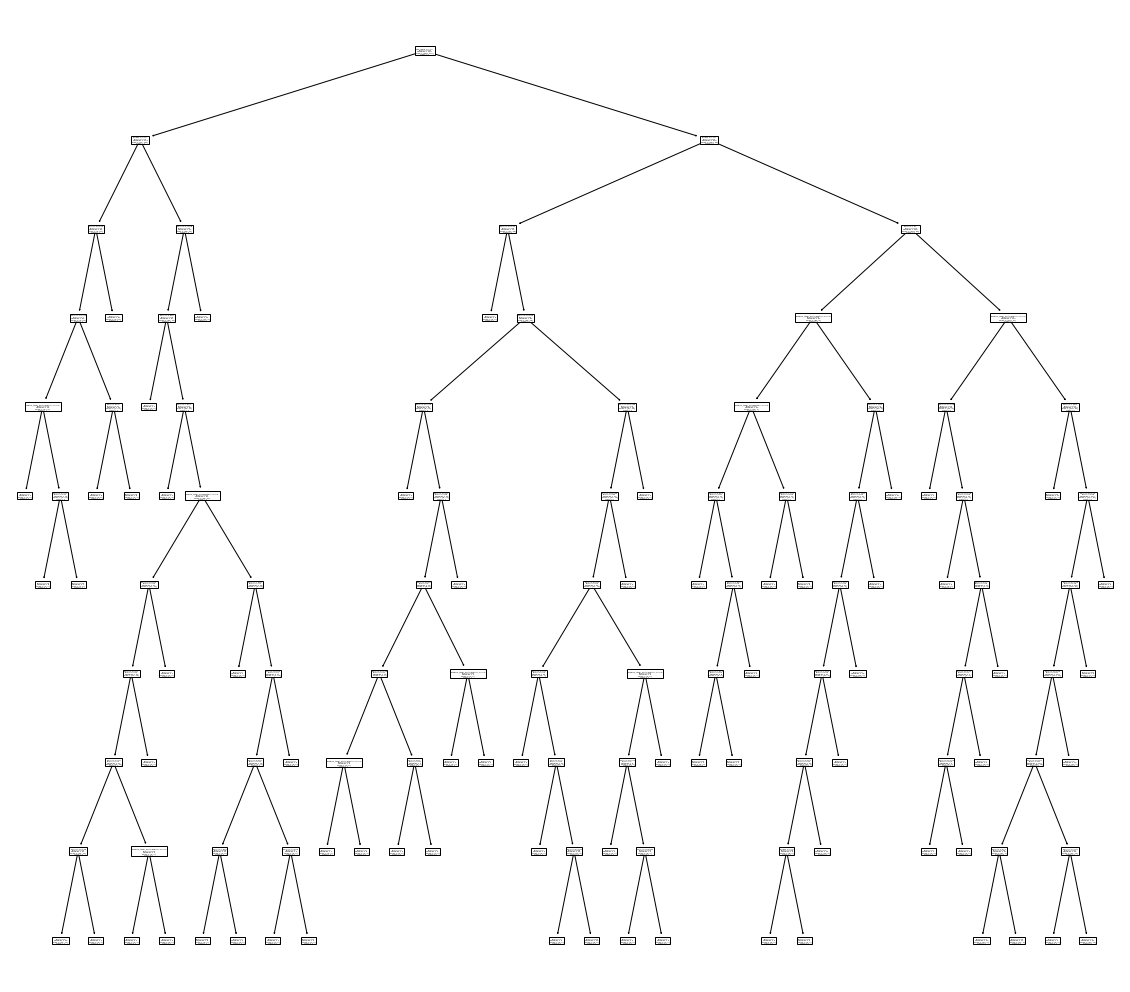

In [111]:
plt.figure(figsize=(20,18))
plot_tree(tree_1, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [112]:
predictions = tree_1.predict(X_train)
actual = y_train

In [113]:
# train

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       298
           1       0.87      0.80      0.83       200

    accuracy                           0.87       498
   macro avg       0.87      0.86      0.86       498
weighted avg       0.87      0.87      0.87       498



In [114]:
# validate

predictions = tree_1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        81
           1       0.64      0.68      0.66        44

    accuracy                           0.75       125
   macro avg       0.73      0.74      0.73       125
weighted avg       0.76      0.75      0.75       125



In [115]:
# test

predictions = tree_1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       170
           1       0.80      0.76      0.78        98

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



### 6. Which model performs better on your in-sample data?

* Model 1 : depth = 5 ----------- 81%, 78%, 82%
* Model 2 : depth = 10----------- 87%, 75%, 84%

In [ ]:
# Model 2 performs better on in-sample data

### 7. Which model performs best on your out-of-sample data, the validate set?

In [ ]:
# Model 1 performs better on the validate data

# Telco data

In [2]:
import acquire
raw_data = acquire.get_telco_data()
raw_data.head()

,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,Mailed check,One year
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,1,2,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month


In [4]:
telco = raw_data.copy()

from prep import clean_telco_data

telco = clean_telco_data(telco)
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,number_relationships,number_online_services,yearly_tenure,has_internet
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,0,0,0,1,2,1,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,0,1,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,0,0,1,0,0,0,0,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,1,0,0,1,0,1,1,1,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,0,0,0,1,1,0,0,1


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   phone_service                          7032 non-null   object 
 6   multiple_lines                         7032 non-null   object 
 7   online_security                        7032 non-null   object 
 8   online_backup                          7032 non-null   object 
 9   device_protection                      7032 non-null   object 
 10  tech_support                           7032 non-null   object 
 11  stre

In [14]:
telco = telco.astype(str)
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   gender                                 7032 non-null   object
 1   senior_citizen                         7032 non-null   object
 2   partner                                7032 non-null   object
 3   dependents                             7032 non-null   object
 4   tenure                                 7032 non-null   object
 5   phone_service                          7032 non-null   object
 6   multiple_lines                         7032 non-null   object
 7   online_security                        7032 non-null   object
 8   online_backup                          7032 non-null   object
 9   device_protection                      7032 non-null   object
 10  tech_support                           7032 non-null   object
 11  streaming_tv     

In [7]:
# set up baseline prediction  ------ churn = 0
telco.churn_encoded.value_counts()

0    5163
1    1869
Name: churn_encoded, dtype: int64

In [12]:
telco.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

In [20]:
telco['churn_baseline_prediction'] = '0'
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,number_relationships,number_online_services,yearly_tenure,has_internet,churn_baseline_prediction
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,0,0,1,2,1,0,1,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,0,0,1,0,0,0,1,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,1,0,0,1,0,0,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,0,1,0,1,1,1,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,1,1,0,0,1,0


In [21]:
(telco.churn_encoded == telco.churn_baseline_prediction).mean()

0.7342150170648464

In [22]:
x = classification_report(telco.churn_encoded, telco.churn_baseline_prediction,
                         labels = [1,0],
                         output_dict = True)
pd.DataFrame(x).T

,precision,recall,f1-score,support
1,0.000000,0.000000,0.000000,1869.0
0,0.734215,1.000000,0.846740,5163.0
micro avg,0.734215,0.734215,0.734215,7032.0
macro avg,0.367108,0.500000,0.423370,7032.0
weighted avg,0.539072,0.734215,0.621690,7032.0
